<a href="https://colab.research.google.com/github/12032004/Anxiety-prediction-using-Pygame-and-ML/blob/main/Anxiety_prediction_orginial_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving GAME OUTPUT.xlsx to GAME OUTPUT.xlsx


In [ ]:
df.read_excel('GAME OUTPUT.xlsx')

In [ ]:
if 'name' in df.columns:
    df.drop('name', axis=1)

In [ ]:
if 'gender' in df.columns:
    df['GENDER'] = df['gender'].map({'Male': 0, 'Female': 1})


In [ ]:
if 'level' in df.columns:
    df['LEVEL'] = df['level'].map({'Low': 1, 'Moderate': 2, 'High': 3})

In [ ]:
import pandas as pd

df = pd.read_excel('GAME OUTPUT.xlsx')

if 'name' in df.columns:
    df.drop('name', axis=1, inplace=True)  # Add inplace=True to modify df directly

if 'gender' in df.columns:
    df['GENDER'] = df['gender'].map({'Male': 0, 'Female': 1})

if 'level' in df.columns:
    df['LEVEL'] = df['level'].map({'Low': 1, 'Moderate': 2, 'High': 3})

# Select only numeric columns before calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Fill NaN values in numeric columns with their respective means
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.mean())

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# ... (your previous code for data cleaning and outlier handling) ...

# 1. Identify categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# 2. Create a LabelEncoder object
label_encoder = LabelEncoder()

# 3. Encode categorical features
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 4. Split data into training and testing sets
x = df.drop('SCORE', axis=1)
y = df['SCORE']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5. Fit the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [ ]:
print(f"linear regression MSE: {lr_mse:.2f}, R-squared: {lr_r2:.2f}")
print(f"Random Forest-MSE: {rf_mse:.2f},R-squared:{rf_r2:.2f}")

linear regression MSE: 456.28, R-squared: -0.85
Random Forest-MSE: 408.77,R-squared:-0.65


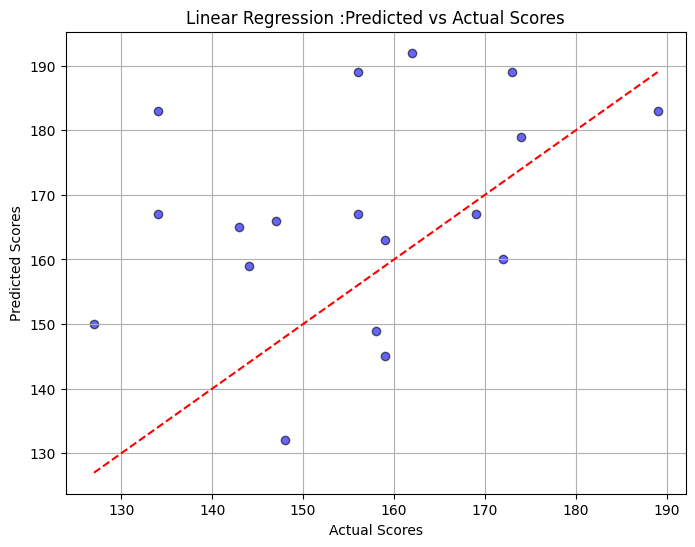

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred, color='blue',alpha=0.6,edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression :Predicted vs Actual Scores')
plt.grid()
plt.show()

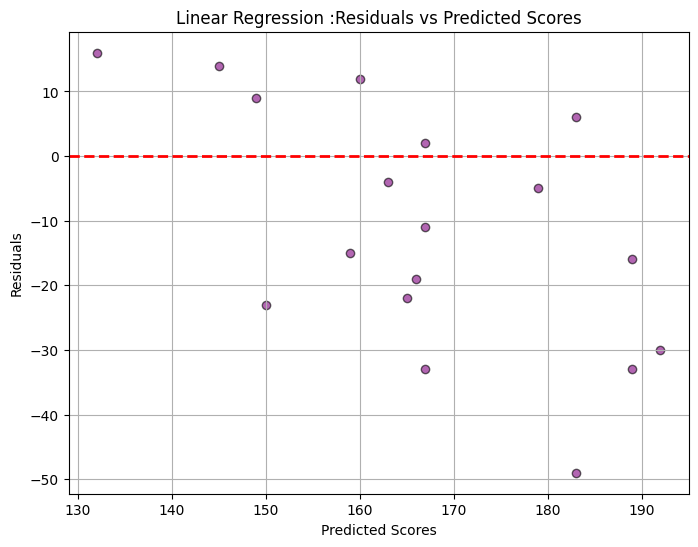

In [ ]:
lr_residuals=y_test-lr_y_pred
plt.figure(figsize=(8,6))
plt.scatter(lr_y_pred,lr_residuals,color='purple',alpha=0.6,edgecolor='k')
plt.axhline(y=0,color='red',linestyle='--',linewidth=2)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Linear Regression :Residuals vs Predicted Scores')
plt.grid()
plt.show()

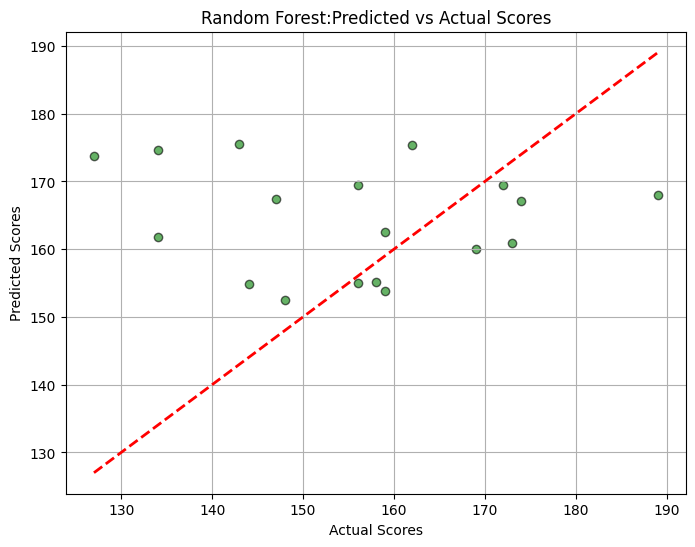

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred,color='green',alpha=0.6,edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--',linewidth=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Random Forest:Predicted vs Actual Scores')
plt.grid()
plt.show()

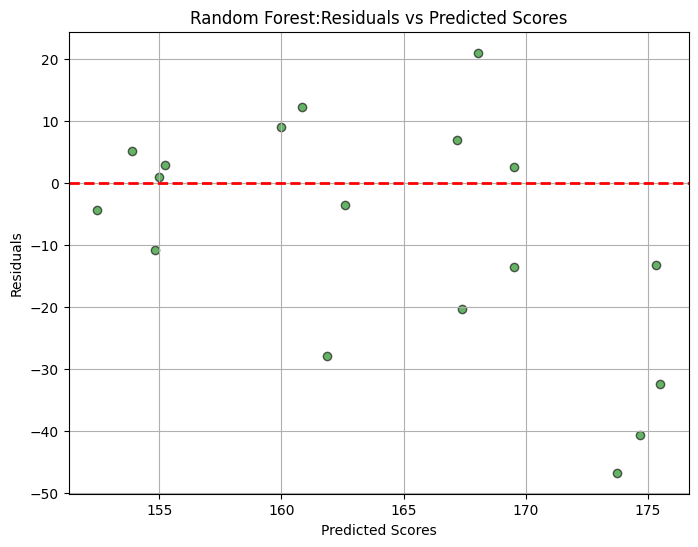

In [ ]:
rf_residuals=y_test-rf_y_pred
plt.figure(figsize=(8,6))
plt.scatter(rf_y_pred,rf_residuals,color='green',alpha=0.6,edgecolor='k')
plt.axhline(y=0,color='red',linestyle='--',linewidth=2)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Random Forest:Residuals vs Predicted Scores')
plt.grid()
plt.show()

In [ ]:

from sklearn.model_selection import cross_val_score # Import cross_val_score
import numpy as np # import numpy for np.mean()

cv_SCORE = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_SCORE)
print(f"Cross-Validation MSE: {cv_mse:.2f}")

Cross-Validation MSE: 412.00


In [ ]:
import numpy as np

# Assuming lr_y_pred contains your predictions from the linear regression model
# If you have predictions stored in another variable, replace lr_y_pred with that variable
y_pred_array = np.array(lr_y_pred)  # Use lr_y_pred instead of lr_y

y_test_array = np.array(y_test)
error_margin = 10
accurate_predictions = np.sum(np.abs(y_test_array - y_pred_array) <= error_margin)
total_predictions = (accurate_predictions / len(y_test_array)) * 100  # Remove extra .sum()

print(f"Accurate Predictions within {error_margin} margin: {accurate_predictions}")
print(f"Accuracy Percentage: {total_predictions:.2f}%")

Accurate Predictions within 10 margin: 5
Accuracy Percentage: 27.78%
